In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



In [3]:
# Load the data
data = pd.read_csv("SAT_GPA.csv")
print(data.head())

   SAT_Scores  GPA
0         206  2.3
1         214  2.4
2         717  3.5
3         580  2.8
4         404  2.6


In [4]:
# Check the shape of the data
print(data.shape)

(200, 2)


In [5]:
# Data Preprocessing
# Check the datatype
print(data.dtypes)

SAT_Scores      int64
GPA           float64
dtype: object


In [6]:
# Check for null values
print(data.isna().sum())

SAT_Scores    0
GPA           0
dtype: int64


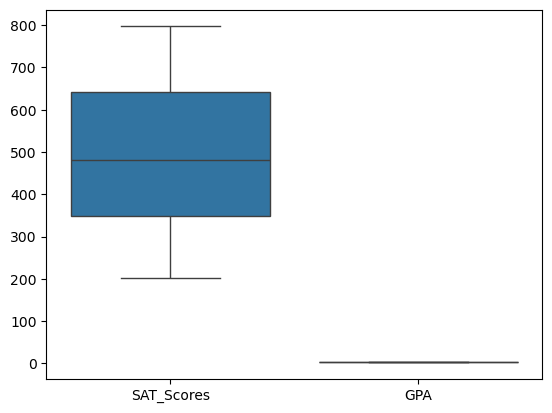

In [8]:
# Check for outliers
sns.boxplot(data[["SAT_Scores", "GPA"]])
plt.show()

In [9]:
# Descriptive statistics
print(data.describe())

       SAT_Scores         GPA
count  200.000000  200.000000
mean   491.810000    2.849500
std    174.893834    0.541076
min    202.000000    2.000000
25%    349.750000    2.400000
50%    480.500000    2.800000
75%    641.500000    3.400000
max    797.000000    3.900000


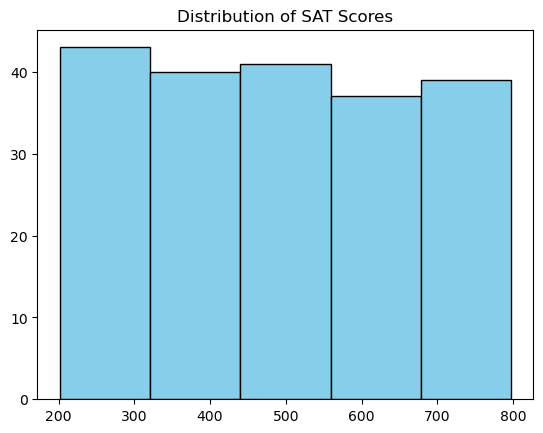

In [11]:
# Univariate Analysis
plt.hist(data['SAT_Scores'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribution of SAT Scores")
plt.show()

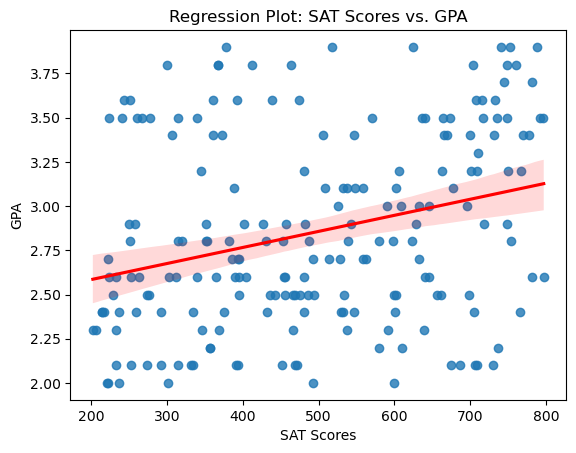

In [13]:
# Bivariate Analysis
# Scatter plot with regression line
sns.regplot(x=data['SAT_Scores'], y=data['GPA'], line_kws={"color": "red"})
plt.xlabel("SAT Scores")
plt.ylabel("GPA")
plt.title("Regression Plot: SAT Scores vs. GPA")
plt.show()

In [15]:
# Model Building
# Simple Linear Regression model
X = data[['SAT_Scores']]
y = data['GPA']


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

In [17]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions
y_pred = model.predict(X_test)

In [19]:

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Simple Linear Regression - RMSE: {rmse}, R-Squared: {r2}')


Simple Linear Regression - RMSE: 0.547475367289355, R-Squared: 0.0057906035703984005


In [20]:

# Apply different transformations and calculate RMSE and correlation coefficient for each model

# Log Transformation
X_log = np.log(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2_log = r2_score(y_test_log, y_pred_log)
print(f'Log Transformation - RMSE: {rmse_log}, R-Squared: {r2_log}')


Log Transformation - RMSE: 0.5440367189724863, R-Squared: 0.018240479010371957


In [21]:
# Polynomial Transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Transformation - RMSE: {rmse_poly}, R-Squared: {r2_poly}')


Polynomial Transformation - RMSE: 0.5520338468768945, R-Squared: -0.010834623427158352


In [22]:
# Choose the best fit model
best_model = min([(rmse, r2, 'Simple Linear Regression'), (rmse_log, r2_log, 'Log Transformation'), (rmse_poly, r2_poly, 'Polynomial Transformation')])

print(f'Best Model: {best_model[2]} with RMSE: {best_model[0]} and R-Squared: {best_model[1]}')

Best Model: Log Transformation with RMSE: 0.5440367189724863 and R-Squared: 0.018240479010371957
